<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 1-Pregunta 1 </H3>
<H3 align='center'> Jorge Nuñez-Diego Alvarez  </H3>
<hr style="height:2px;border:none"/>



<a id="primero"></a>
## 1. Aprendizaje con regresión lineal.

La regresión lineal, modelo que busca la mejor forma de combinar linealmente variables para predecir otra variable numérica es una de las herramientas más básicas a nuestra disposición. Sin embargo se puede encontrar muchas aplicaciones a esta aproximación con buenos resultados, y suele ser un buen punto de partida para problemas totalmente desconocidos por su velocidad de implementar y simpleza de interpretar. Además, al igual que muchas de las técnicas de _Machine Learning_, no tiene un ambito de uso definido, es decir podemos aplicar un metodo similar para problemas radicalmente distintos. 

<img src="https://i.stack.imgur.com/cNJQs.png" style="height:50%;" />

En esta primera parte de la tarea, trabajaremos con un _dataset_ de _Kaggle_ llamado "_Black Friday_", el cual contiene alrededor de medio millón de registros. Este _dataset_ contiene diversas informaciones sobres los consumidores (edad, ocupación, género, entre otros) y el valor de la compra que realizaron al momento de la medición. Pueden descargar el _dataset_ desde https://www.kaggle.com/mehdidag/black-friday. Este _dataset_ fue pensado para intentar de predecir el valor de compra de un cliente en funcion de sus caracteristicas, sin embargo uno puede realizar distintas regresiones y tratar, por ejemplo, de predecir el rango de edad de un cliente basado en sus otras caracteristicas incluyendo el valor de su compra. En esta primera parte utilizaremos el set de datos para hacer regresión lineal sobre el valor de compra, es decir la variable a predecir es el valor de compra. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression


#### 1.a) Modulo y carga de datos

In [2]:
data = pd.read_csv('BlackFriday.csv')
print(pd.read_csv("BlackFriday.csv").isna())#asigna true cuando no existe dati o N/A
print(pd.read_csv("BlackFriday.csv").isna().sum())#suma todos los valores true
print(data.describe())#entrega promedios, max, min, precentiles
print(data.groupby("Gender").User_ID.nunique())#entrega total usuarios F y M


        User_ID  Product_ID  Gender    Age  Occupation  City_Category  \
0         False       False   False  False       False          False   
1         False       False   False  False       False          False   
2         False       False   False  False       False          False   
3         False       False   False  False       False          False   
4         False       False   False  False       False          False   
5         False       False   False  False       False          False   
6         False       False   False  False       False          False   
7         False       False   False  False       False          False   
8         False       False   False  False       False          False   
9         False       False   False  False       False          False   
10        False       False   False  False       False          False   
11        False       False   False  False       False          False   
12        False       False   False  False       Fa

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64
            User_ID    Occupation  Marital_Status  Product_Category_1  \
count  5.375770e+05  537577.00000   537577.000000       537577.000000   
mean   1.002992e+06       8.08271        0.408797            5.295546   
std    1.714393e+03       6.52412        0.491612            3.750701   
min    1.000001e+06       0.00000        0.000000            1.000000   
25%    1.001495e+06       2.00000        0.000000            1.000000   
50%    1.003031e+06       7.00000        0.000000            5.000000   
75%    1.004417e+06      14.0000

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Descripción de las columnas

In [4]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

|Columns                    | Descripción                           |
|:-------------------------:|:-------------------------------------:|
|User_ID                    | ID del usuario                        |
|Product_ID                 | ID del producto                       |
|Gender                     | Genero (M/F)                          |
|Age                        | Edad en rangos                        |
|Occupation                 | Ocupación                             |
|City_Category              | Categoria ciudad (A B C)              |
|Stay_In_Current_City_Years | Número de años de estadia en la ciudad|
|Marital_status             | Estado civil (binario)                |
|Product_Category_1         | Producto de categoría 1               |
|Product_Category_2         | Producto de categoria 2               |
|Product_Category_3         | Producto de categoria 3               |
|Purchase                   | Valor de la venta en dólares          |
 

Cuente los valores N/A de cada columna con el siguiente código y explique brevemente porque en un primer momento preferiremos eliminar la segunda y tercera categoría del producto.

In [5]:
print(data.groupby("Gender").User_ID.nunique())

Gender
F    1666
M    4225
Name: User_ID, dtype: int64


**Comentario:** Seobserva que los hombres realizan casi 3 veces mas compras que las mujeres

In [6]:
data.groupby("Age").mean()['Purchase']

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

**Comentario:** Se observa que en promedio todos los rangos etarios gatas la misma cantidad de dinero.

In [7]:
print(pd.read_csv("BlackFriday.csv").isna().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64


**Comentario**: en las columnas Product_Category_2 y Product_Category_3 exiten gran cantidad de datos faltantes, por lo que dichas columnas pueden causar problemas en la regresión, por lo que resulta mejor elimar ese dato o categoria de la data.

#### 1.b) Columnas descartadas

In [8]:
print(data.City_Category.unique())

['A' 'C' 'B']


**Comentario**: existen 3 categorias de ciudades diferentes 'A' 'B' 'C'

In [9]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [10]:
data = data.drop(columns=['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']) 


**Comentario**: primeramente se eliminan las columnas que nos entregan informacion poco relevante 'User_ID;Product_ID',
                con lo cual disminuimos el numero de parametros a aprender, al igual se eliminan las clumnas 
                'Product_Category_2;Product_Category_3' debido a que falta muchos datos y resulta mas conveniente 
                eliminar la columna a las filas.

#### 1.c) Datos categoricos
Transformaremos ahora los datos no numericos a datos numéricos.

In [11]:
data['Gender'] = data.Gender.apply(lambda x: {'F':1,'M':0}[x])
data['Stay_In_Current_City_Years'] = data.Stay_In_Current_City_Years.apply(lambda x: {'0':0,'1':1,'2':2,'3':3,'4+':4}[x])
data['Age'] = data.Age.apply(lambda x: {'0-17':8.5,'18-25':21.5,'26-35':30.5,'36-45':40.5,'46-50':48,'51-55':53,'55+':55}[x])

**Comentario**: en este caso funciona tratarlo como variable binaria al ser una variable dicotomica (hombre o mujer) o datos cuantitativos.

In [12]:
data_pre = pd.get_dummies(data.City_Category)
data_pre2 = pd.get_dummies(data.Occupation)

In [13]:
data_pre=data_pre.rename(columns = {'A':'City_A'})
data_pre=data_pre.rename(columns = {'B':'City_B'})
data_pre=data_pre.rename(columns = {'C':'City_C'})


In [14]:
data = data.drop(columns=['City_Category'])
data = data.drop(columns=['Occupation'])

In [15]:
data = pd.concat([data,data_pre],axis=1)
data = pd.concat([data,data_pre2],axis=1)

In [16]:
data_pre = data
data_pre_2 = data_pre

**Comentario**: para el caso de los años de permanencia en la ciudad al una variable cuantiativa, reemplazamos los años
    por su respectivo valor, para 4+ se asigna el valor 4 .

**Comentario**: para variables cualitativas nominales es conveniente utilizar 'get_durmis', ya que estas variables
no pueden ser ordenadas segun un criterio de orden o escala el problema es que se agregan mas variables al problema. 

#### 1.d) Separación de datos
Separaremos los datos en train, validation y test con 75%, 15% y 10% de los datos respectivamente. Verifique que se cumplen aproximadamente las proporciones. Luego separe el target del resto de las variables que consideraremos. 

In [17]:
total=len(data_pre)
df_train=data_pre[:int(0.75*total)]                       #75% de los datos
df_val=data_pre[int(0.75*total):int(0.90*total)]          #15% de los datos
df_test=data_pre[int(0.90*total)::]                       #10% restante

total_2=len(data_pre_2)
df_train_2=data_pre_2[:int(0.75*total)]                       #75% de los datos
df_val_2=data_pre_2[int(0.75*total):int(0.90*total)]          #15% de los datos
df_test_2=data_pre_2[int(0.90*total)::]                       #10% restante



In [18]:
df_train.head()

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Purchase,City_A,City_B,City_C,0,1,...,11,12,13,14,15,16,17,18,19,20
0,1,8.5,2,0,8370,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8.5,2,0,15200,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8.5,2,0,1422,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,8.5,2,0,1057,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,55.0,4,0,7969,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
print('df_train = '+str(len(df_train)/total))
print('df_val = '+str(len(df_val)/total))
print('df_test = '+str(len(df_test)/total))

df_train = 0.749998604851026
df_val = 0.15000083708938441
df_test = 0.1000005580595896


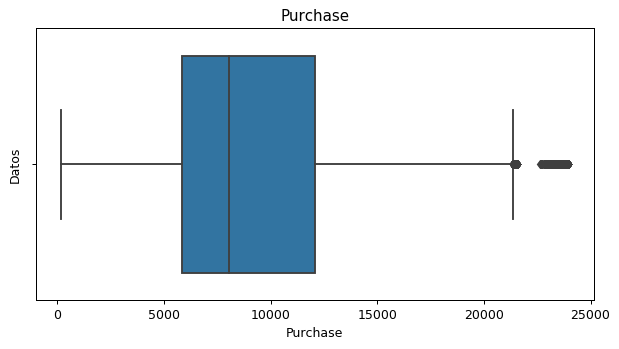

In [20]:
plt.figure(figsize=(8,4), dpi=90)
sns.boxplot(list(df_train['Purchase']))
plt.ylabel('Datos')
plt.xlabel('Purchase')
plt.title('Purchase')
plt.show()

**Comentario:** Es posible apreciar en el boxplot que los valores de compra 'Purchase' estan sesgados hacia los valores mas bajos, quedando como outlaier auqellas compras por sobre los 21000 aproximadamente.

#### 1.e) Estandarización de datos

In [21]:

X_train = df_train_2
Y_t = X_train.pop('Purchase')
Y_train = Y_t.values.reshape(-1,1)

X_val = df_val_2
Y_v = X_val.pop('Purchase')
Y_val = Y_v.values.reshape(-1,1)

X_test = df_test_2
Y_tt = X_test.pop('Purchase')
Y_test = Y_tt.values.reshape(-1,1)

scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
Y_train_scaled = X_train_scaled.pop('Purchase').values.reshape(-1,1)

X_val_scaled = pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
Y_val_scaled = X_val_scaled.pop('Purchase').values.reshape(-1,1)

X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
Y_test_scaled = X_test_scaled.pop('Purchase').values.reshape(-1,1)



In [22]:
Y_t

0          8370
1         15200
2          1422
3          1057
4          7969
5         15227
6         19215
7         15854
8         15686
9          7871
10         5254
11         3957
12         6073
13        15665
14         5378
15         2079
16        13055
17         8851
18        11788
19        19614
20         8584
21         9872
22         9743
23         5982
24        11927
25        16662
26         5887
27         6973
28         5391
29        16352
          ...  
403152     7957
403153     5304
403154     1420
403155     5398
403156     3763
403157     7978
403158     1490
403159    19513
403160     8517
403161     4164
403162    12033
403163     4063
403164     3070
403165     1535
403166     3749
403167     4454
403168    19414
403169     9237
403170     8485
403171    15904
403172     3573
403173     6010
403174    19519
403175    15300
403176    19286
403177    19550
403178    15785
403179    19462
403180    19701
403181    15273
Name: Purchase, Length: 

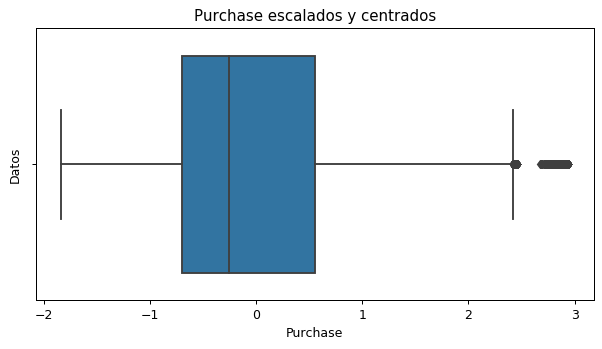

In [23]:
plt.figure(figsize=(8,4), dpi=90)
sns.boxplot(Y_train_scaled)
plt.ylabel('Datos')
plt.xlabel('Purchase')
plt.title('Purchase escalados y centrados')
plt.show()

**Comentario:** Se observa del grafico que al normalizar los datos mediante StandarScaler se logra una distribución más normal de las ventas, ya que StandarScaler hace que para cada dato su media sea cero y la varianza unitaria, pero aún siguen quedando como outlaier los purchase de mayor valor. 

#### A continuación se procede a aplicar logaritmo a los Purchase y visualizar su comportamiento

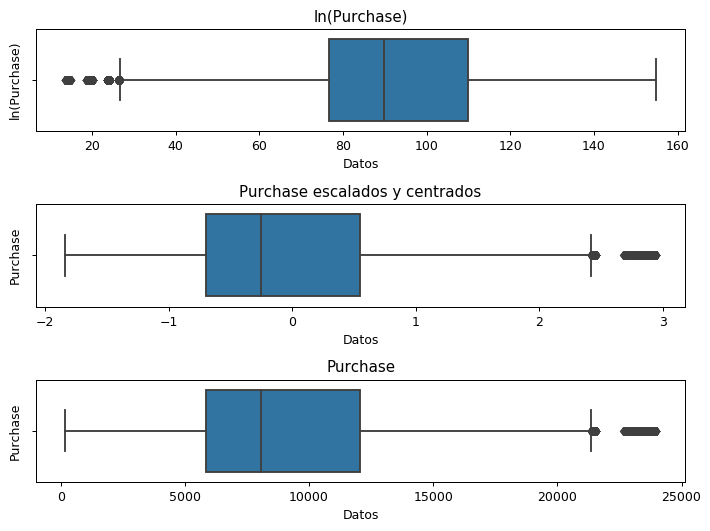

In [24]:
plt.figure(figsize=(8,6), dpi=90)
plt.subplot(3,1,1)
sns.boxplot(list(np.sqrt(df_train['Purchase'])))
plt.xlabel('Datos')
plt.ylabel('ln(Purchase)')
plt.title('ln(Purchase)')

plt.subplot(3,1,2)
sns.boxplot(list(Y_train_scaled))
plt.xlabel('Datos')
plt.ylabel('Purchase')
plt.title('Purchase escalados y centrados')

plt.subplot(3,1,3)
sns.boxplot(list(df_train['Purchase']))
plt.xlabel('Datos')
plt.ylabel('Purchase')
plt.title('Purchase')

plt.tight_layout()
plt.show()

**Comentarios:** Al visualizar el boxplot de los datos luego de aplicar logaritmo, se aprecia no hubo una mejora yaque los datos se sesgaron hacia la derecha quedando como outlaier las ventas de menor precio y a la vez aumentarón la cantidad de estos. Con lo cual se puede concluir que lo mas indicado es utilizar los datos escalados y normalizados.


#### 1.f) Primera Regresión

#### Regresión lineal sobre el conjunto de Train

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg_scaled = LinearRegression()
reg_scaled.fit(X_train_scaled,Y_train_scaled)
reg_scaled.score(X_test_scaled,Y_test_scaled)

0.01053922929492146

In [26]:
reg_scaled = LinearRegression()
reg_scaled.fit(X_train,Y_train)
reg_scaled.score(X_test,Y_test)


0.010527713131028849

**Comentarios:** Se puede obsrvar de los resultados obtenidos que el score es muy parecido para los dos casos y muy bajo esto quiere decir que esta logrando predecir de buena manera el promedio de los datos debido a la forma del cálculo del score.

In [27]:
from sklearn.metrics import mean_squared_error as mse
Y_pred_test=reg_scaled.predict(X_test_scaled)




#### 1.g) Transformaciones simples

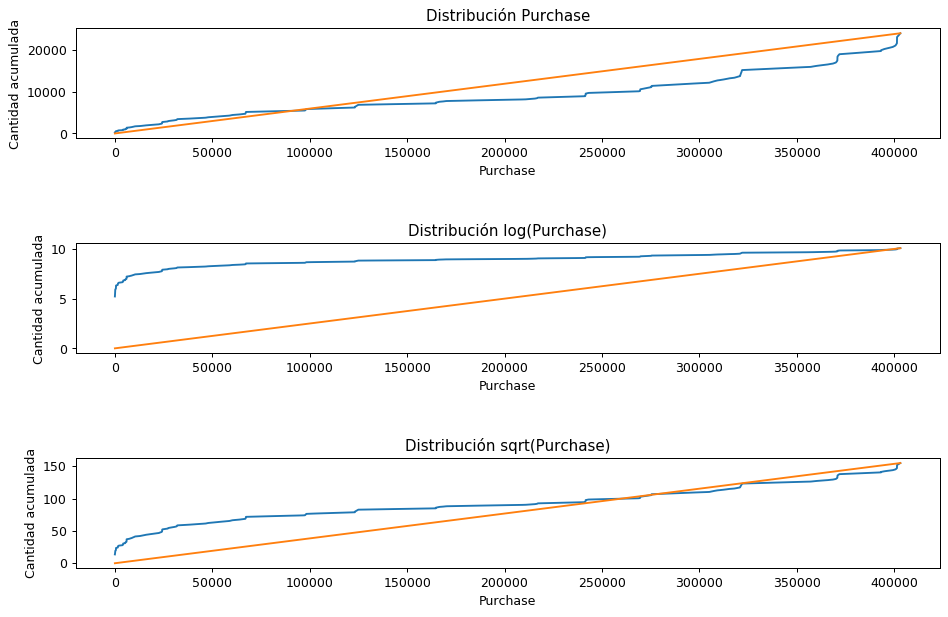

In [28]:
data_y_train = Y_t
plt.figure(figsize=(6,6), dpi=90)
plt.subplot(3,1,1)
plt.plot(np.arange(0,data_y_train.shape[0],1),data_y_train.sort_values(),np.arange(0,data_y_train.shape[0],1),
         np.linspace(0,((data_y_train.sort_values())).max(),num=data_y_train.shape[0]))
plt.ylabel('Cantidad acumulada')
plt.xlabel('Purchase')
plt.title('Distribución Purchase')

data_y_train = np.log(Y_t)
plt.subplot(3,1,2)
plt.plot(np.arange(0,data_y_train.shape[0],1),data_y_train.sort_values(),np.arange(0,data_y_train.shape[0],1),
         np.linspace(0,((data_y_train.sort_values())).max(),num=data_y_train.shape[0]))
plt.ylabel('Cantidad acumulada')
plt.xlabel('Purchase')
plt.title('Distribución log(Purchase)')

data_y_train = np.sqrt(Y_t)
plt.subplot(3,1,3)
plt.plot(np.arange(0,data_y_train.shape[0],1),data_y_train.sort_values(),np.arange(0,data_y_train.shape[0],1),
         np.linspace(0,((data_y_train.sort_values())).max(),num=data_y_train.shape[0]))
plt.ylabel('Cantidad acumulada')
plt.xlabel('Purchase')
plt.title('Distribución sqrt(Purchase)')

plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=0.95,
                    wspace=0.2)

plt.show()

#### Se presenta la matriz de correlación entre los datos 

In [29]:
data

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Purchase,City_A,City_B,City_C,0,1,...,11,12,13,14,15,16,17,18,19,20
0,1,8.5,2,0,8370,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8.5,2,0,15200,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8.5,2,0,1422,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,8.5,2,0,1057,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,55.0,4,0,7969,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,30.5,3,0,15227,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,48.0,2,1,19215,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,48.0,2,1,15854,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,48.0,2,1,15686,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,30.5,1,1,7871,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


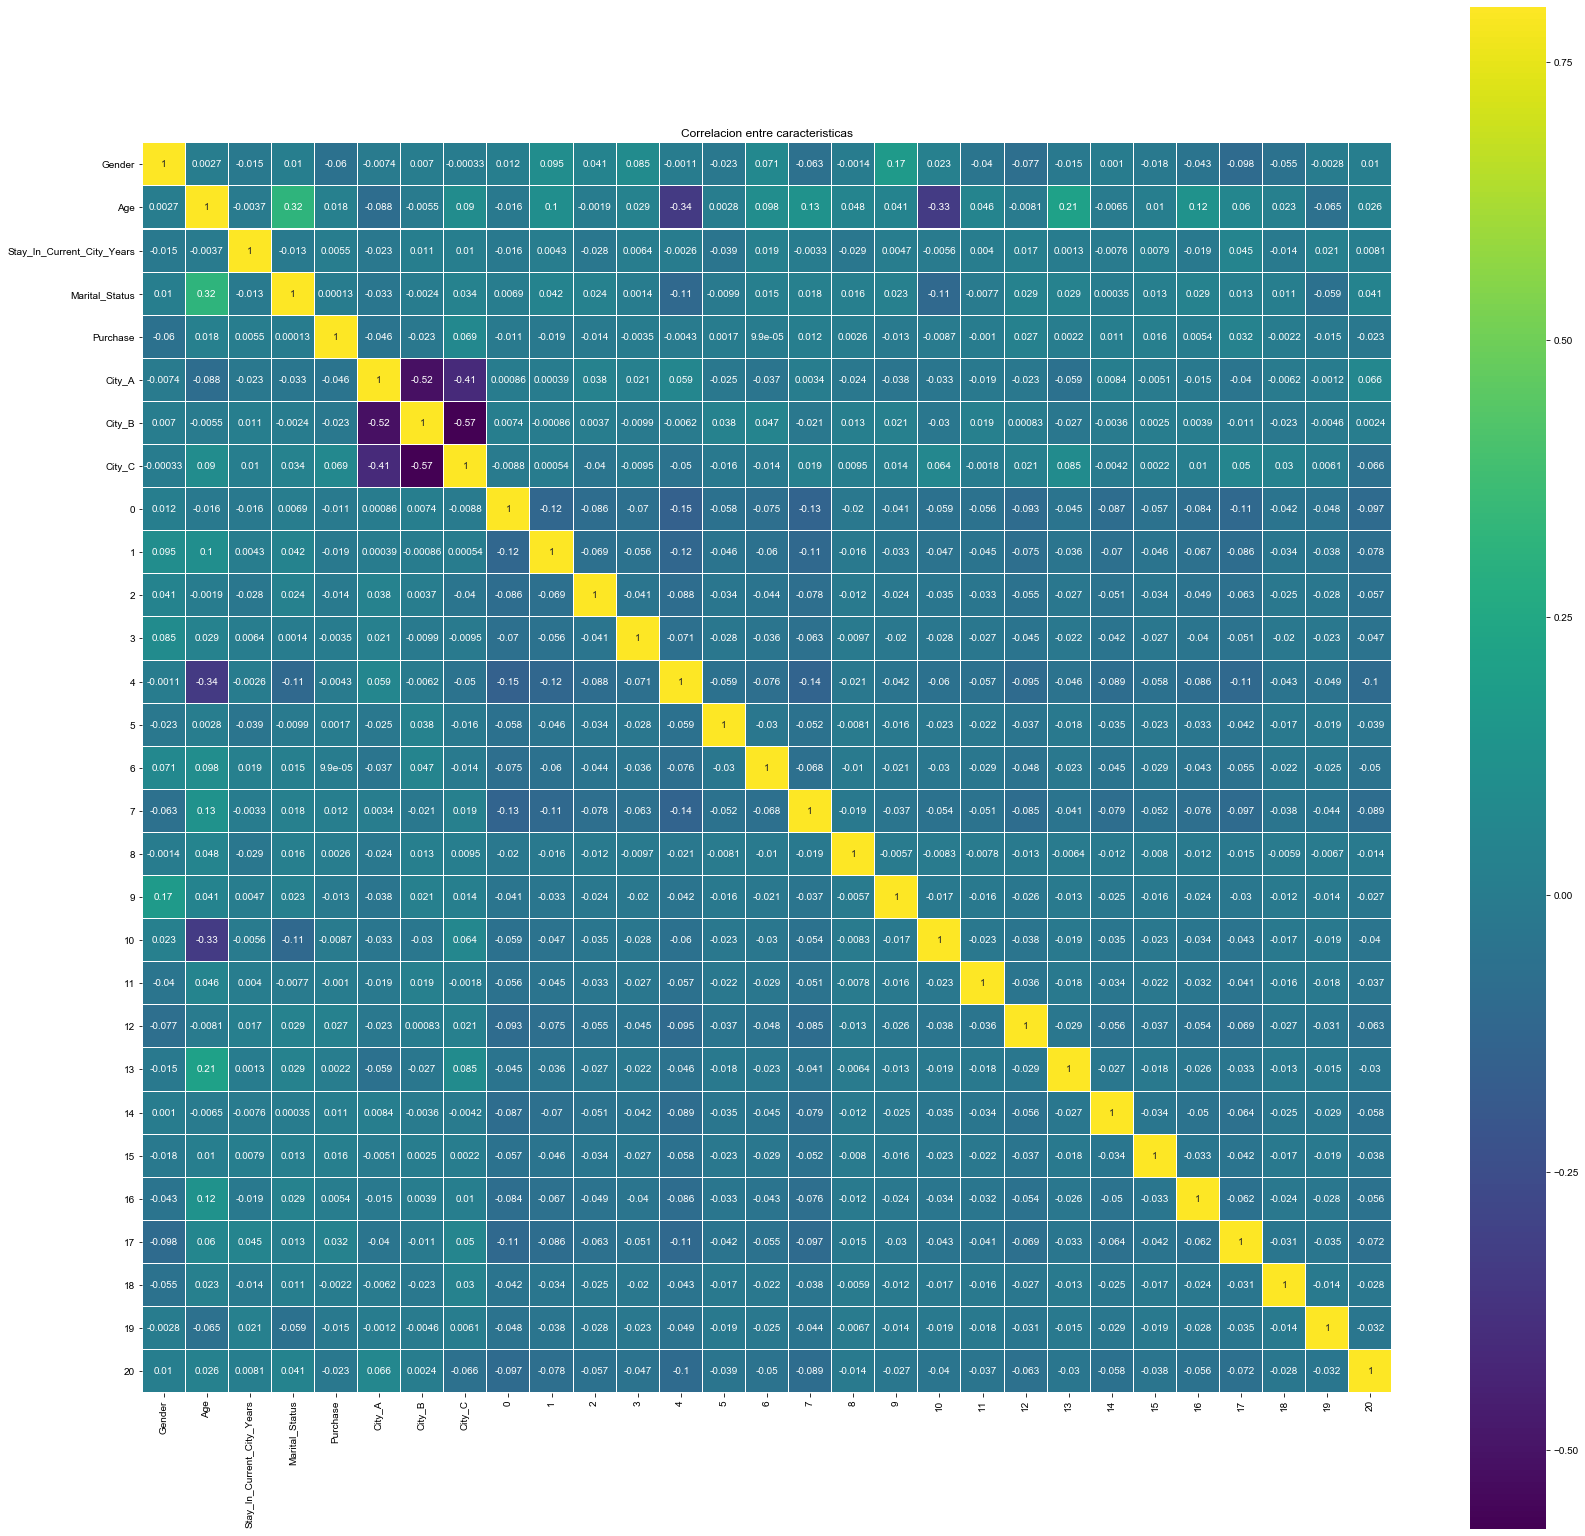

In [30]:

plt.figure(figsize=(28,28))
sns.heatmap(data.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.title('Correlacion entre caracteristicas');
plt.show()

**Comentario:** Se observa correlación casi nula entre las variables y la salida Purchase.

#### 1.h 10-_fold_ sobre la potencia

In [31]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=10)
mean_sc_f = []
for i in range (1,21):
    scores = []
    for result in (folds.split(X_train)):
        train_index = result[0]
        val_index = result[1]
        y_i = Y_t
        y_tr_i = ((y_i.iloc[train_index]).values.reshape(-1,1))**(i/10)
        x_tr_i = X_train.iloc[train_index]
        y_vl_i = ((y_i.iloc[val_index]).values.reshape(-1,1))**(i/10)
        x_vl_i = X_train.iloc[val_index]
        reg_scaled = LinearRegression()
        reg_scaled.fit(x_tr_i,y_tr_i)
        scor = reg_scaled.score(x_vl_i,y_vl_i)
        scores.append(scor)
    mean_sc = np.mean(scores)
    mean_sc_f.append(mean_sc)
    
print('scores='+str(mean_sc_f))
    
        

        

scores=[0.009127934673408434, 0.009556125192748444, 0.009926532413671706, 0.01024026435704527, 0.010500470202242563, 0.010710658994643473, 0.010874722634838518, 0.010997147495353998, 0.011082155190762166, 0.011133513613223933, 0.011155314145047201, 0.011151324969655162, 0.01112426962817158, 0.011077473722913145, 0.01101337167851053, 0.010934418474562436, 0.010842327398090301, 0.010739156251858306, 0.01062666556269326, 0.010505872658116821]


In [47]:
 mean_sc_f

[0.009127934673408434,
 0.009556125192748444,
 0.009926532413671706,
 0.01024026435704527,
 0.010500470202242563,
 0.010710658994643473,
 0.010874722634838518,
 0.010997147495353998,
 0.011082155190762166,
 0.011133513613223933,
 0.011155314145047201,
 0.011151324969655162,
 0.01112426962817158,
 0.011077473722913145,
 0.01101337167851053,
 0.010934418474562436,
 0.010842327398090301,
 0.010739156251858306,
 0.01062666556269326,
 0.010505872658116821]

In [59]:
"""
Pi=[]
for i in range(1,21):
    Pi.append(i/10)
x = Pi
y = mean_sc_f
px = 1.1
py = max(y)
fig = plt.figure()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(16,8), dpi=90)
plt.plot(x,y,'oc',x,y,'magenta',px,py,'ko')
plt.annotate('max score ='+str(py),xy=(px,py),fontsize=20,xytext=(1.2,0.011), arrowprops=dict(facecolor='black',shrink=0.05))
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,
            1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])
plt.xlabel(r"$P \gets P^{i}$",fontsize=16, color='black')
plt.ylabel(r'\textit{mean score} ',fontsize=20, color='black')
plt.title(r'\textit{mean score v/s $P \gets P^{i}$ } ',
          fontsize=20, color='gray')
fig.savefig('temp.png', transparent=True)
plt.grid(False)
plt.show()
"""

'\nPi=[]\nfor i in range(1,21):\n    Pi.append(i/10)\nx = Pi\ny = mean_sc_f\npx = 1.1\npy = max(y)\nfig = plt.figure()\nplt.rc(\'text\', usetex=True)\nplt.rc(\'font\', family=\'serif\')\nplt.figure(figsize=(16,8), dpi=90)\nplt.plot(x,y,\'oc\',x,y,\'magenta\',px,py,\'ko\')\nplt.annotate(\'max score =\'+str(py),xy=(px,py),fontsize=20,xytext=(1.2,0.011), arrowprops=dict(facecolor=\'black\',shrink=0.05))\nplt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,\n            1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])\nplt.xlabel(r"$P \\gets P^{i}$",fontsize=16, color=\'black\')\nplt.ylabel(r\'\textit{mean score} \',fontsize=20, color=\'black\')\nplt.title(r\'\textit{mean score v/s $P \\gets P^{i}$ } \',\n          fontsize=20, color=\'gray\')\nfig.savefig(\'temp.png\', transparent=True)\nplt.grid(False)\nplt.show()\n'

In [41]:
reg_scaled = LinearRegression()
reg_scaled.fit(X_train_scaled,(Y_train_scaled))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
Y_pred=reg_scaled.predict(X_test_scaled)

In [43]:
error = (Y_pred-Y_test_scaled)**2

In [44]:
error

array([[0.41846774],
       [1.09538376],
       [4.63755067],
       ...,
       [0.1581362 ],
       [0.3280094 ],
       [0.39994683]])

#### 1.i Q-Q plot
Gráfique el _Quantile-Quantile Plot_ del residuo (error) de validación del merjo modelo que haya encontrado. Qué puede decir respecto al supuesto de normalidad de los residuos en los datos? 

In [37]:
stats.probplot(error.reshape((1,)),dist='norm', plot=plt)

ValueError: cannot reshape array of size 53758 into shape (1,)

**Comentario:** Un gráfico Q-Q permite observar cuan cerca está la distribución de un conjunto de datos a alguna distribución ideal ó comparar la distribución de dos conjuntos de datos.